<a href="https://colab.research.google.com/github/mnsv73/brain-tumour-segmentation/blob/master/Dataset_Information.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The BRATS 2015 training dataset consists of MRI scans of 274 brains out of which 220 contain HGG(High-Grade Gliomas) and 54 contain LGG(Low-Grade Gliomas). HGG tumours are The LGG tumors are less aggressive, with slower growth rate as compared to HGG, and are responsive to therapy.
The data is stored in .mha format, a common biomedical extension. In order to convert this data into a data structure on which calculations can be performed, we used the MedPy library. MedPy is a library and script collection for medical image processing in Python.

In [0]:
!pip3 install medpy

An MRI scan takes a 2D image of brain at different depth and combines them to form a 3D image of the organ. The cell below inspects the MRI scans of BRATS 2015.

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
from sklearn.preprocessing import normalize
from PIL import Image
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from medpy.io import load, save
path2 = '/content/gdrive/My Drive/VSD.Brain.XX.O.MR_T1c.36278/VSD.Brain.XX.O.MR_T1c.36278.mha'
image_t1, image_header1 = load(path2)
print(image_t1.shape)

(240, 240, 155)


The above code converts the MRI scan of brain into an n-dimensional numpy array. The shape of the array tells us that the MRI scan contains 155 2D images of size 240 x 240. Each of the 155 image shows the structure of the brain at a specific depth. The plots of some selected images are shown below.

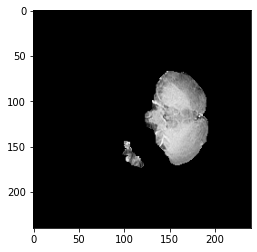

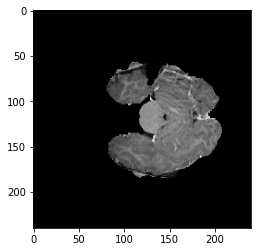

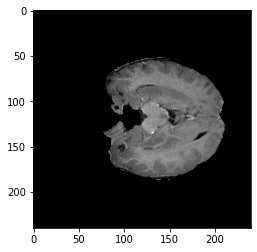

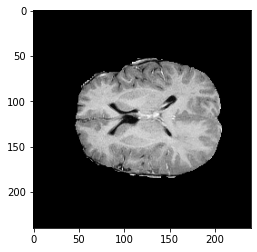

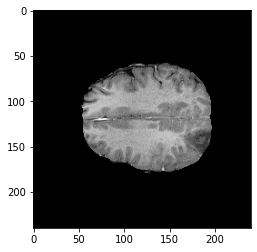

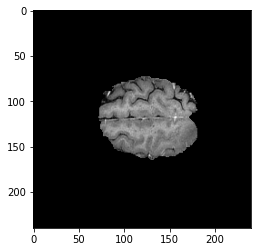

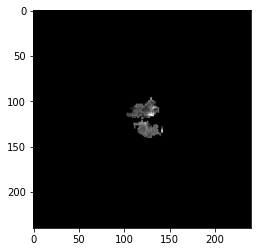

In [0]:
for a in [20,35,50,75,100,120,135]:
  imgt1 = image_t1[:,:,a]
  plt.imshow(imgt1,cmap = cm.Greys_r)
  plt.show()

The borders of brain tumours are fuzzy and hard to distinguish from other healthy cells. To overcome this, more than one MRI modalities are applied. Our dataset contains 4 image modalities - T1, T2, T1_c and FLAIR. These image modalities are stacked upon each other and then sent for training. The cell below shows the middle slice of each modality 

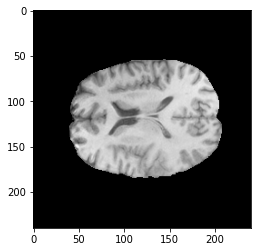

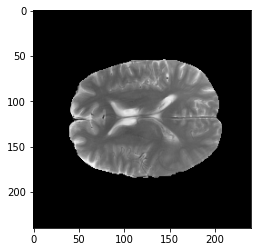

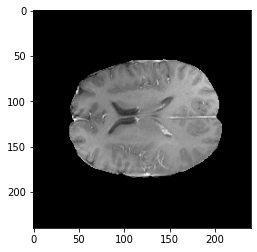

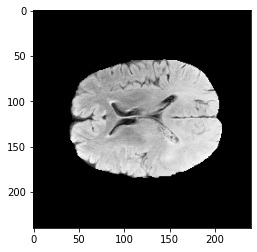

In [0]:
path_1= '/content/gdrive/My Drive/brats_tcia_pat499_0001/VSD.Brain.XX.O.MR_T2.36623/VSD.Brain.XX.O.MR_T2.36623.mha'
path_2 ='/content/gdrive/My Drive/brats_tcia_pat499_0001/VSD.Brain.XX.O.MR_T1c.36622/VSD.Brain.XX.O.MR_T1c.36622.mha'
path_3 = '/content/gdrive/My Drive/brats_tcia_pat499_0001/VSD.Brain.XX.O.MR_T1.36621/VSD.Brain.XX.O.MR_T1.36621.mha'
path_4 = '/content/gdrive/My Drive/brats_tcia_pat499_0001/VSD.Brain.XX.O.MR_Flair.36620/VSD.Brain.XX.O.MR_Flair.36620.mha'
image_t1, image_header1 = load(path_3)
image_t2, image_header1 = load(path_1)
image_t1c, image_header1 = load(path_2)
image_flair, image_header1 = load(path_4)
imgt_1 = image_t1[:,:,77]
plt.imshow(imgt_1,cmap = cm.Greys_r)
plt.show()
imgt_2 = image_t2[:,:,77]
plt.imshow(imgt_2,cmap = cm.Greys_r)
plt.show()
imgt_1c = image_t1c[:,:,77]
plt.imshow(imgt_1c,cmap = cm.Greys_r)
plt.show()
imgt_f = image_flair[:,:,77]
plt.imshow(imgt_f,cmap = cm.Greys_r)
plt.show()

The brains comprise mainly of healthy cells with a small percentage of abnormal cells. So our dataset is expected to imbalanced. The code below shows the extent of imbalance in the ground truth of randomly selected brain. In the BRATS 2015 dataset there are 4 labels:
1 for necrosis,
2 for edema,
3 for non-enhancing tumor,
4 for enhancing tumor,
0 for everything else (background and healthy tissues).

In [0]:
path_5= '/content/gdrive/My Drive/brats_tcia_pat499_0001/VSD.Brain_3more.XX.O.OT.42835/VSD.Brain_3more.XX.O.OT.42835.mha'
image_gt, image_header1 = load(path_5)
total = 240*240*155
print('percentage of healthy tissues : '+ str(np.count_nonzero(image_gt == 0)/total))
print('percentage of necrosis tissues : '+ str(np.count_nonzero(image_gt == 1)/total))
print('percenatge of edema tissues : '+ str(np.count_nonzero(image_gt == 2)/total))
print('percenatge of enhancing tumor : '+ str(np.count_nonzero(image_gt == 3)/total))
print('percenatge of non-enhancing tumor : '+ str(np.count_nonzero(image_gt == 4)/total))


percentage of healthy tissues : 0.9929227150537634
percentage of necrosis tissues : 0.000822244623655914
percenatge of edema tissues : 0.002845766129032258
percenatge of enhancing tumor : 0.0003467741935483871
percenatge of non-enhancing tumor : 0.0030625


From the above numbers, it is clear that our dataset is highly imbalanced with around 1% abnormal tissues. 